# What is EDA?

1. Exploratory Data Analysis as it seems. It helps understand the data better.

2. Variables and their linkage with the Target Variable

3. To Build the Model

4. Understanding of the data better and its kinda know how about the data and its PATTERNS

## EDA Process

1. Univariate Analysis - Analyising Features Single Handedly. 

2. Bivariate Analysis - Predictor Vs Target

3. Missing Values Treatment

4. Outlier Identification - BOX COX TRANSFORMATION..

5. Feature Engineering - Extracting Variables from the Existing variables in the Dataset

6. Ensuring that the Data is following a Standard Scale. If not, apply Standard Scaling.

This 06 Step Process are Called Data Pre-Processing Steps.

7. Model Building Stage - This is the stage where the Data is ready to be used as Input for Model.

## Retail Industry: Big Sales Mart

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np

In [90]:
train = pd.read_csv("./Downloads/Train_UWu5bXk.csv")
test = pd.read_csv("./Downloads/Test_u94Q5KV.csv")

In [3]:
# preview the dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Basic Checks on Dataset
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [5]:
# finding the Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


### EDA Step 01. Univariate Analysis

In [6]:
# Item Outlet Sales
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


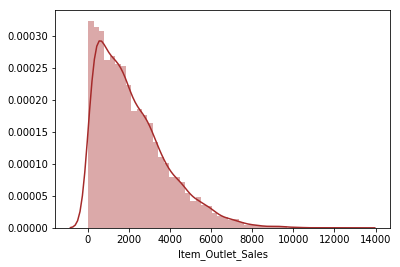

In [7]:
sns.distplot(train.Item_Outlet_Sales, color="brown")

In [8]:
# Summary Statistics of Sales
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [9]:
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


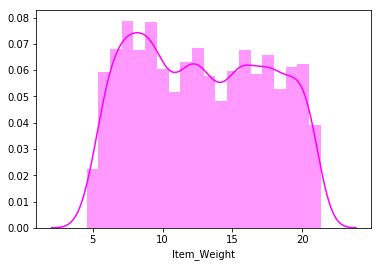

In [10]:
sns.distplot(train[pd.notnull(train.Item_Weight)]["Item_Weight"], 
             color="magenta")

### Observation: Item Weight
No Shape Identified in Item Weight and However, Item Weight has Missing Values

In [11]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

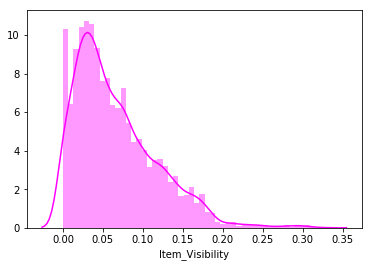

In [12]:
# Item Visibility
sns.distplot(train["Item_Visibility"], color="magenta")

In [13]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### Observation: Item Visibility

Item Visibility has lots of 0s in the Dataset which is not correct. This needs correction

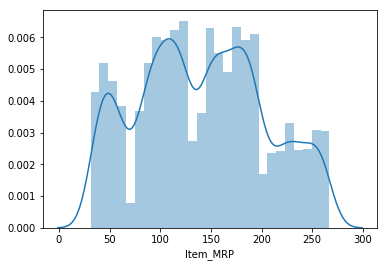

In [14]:
# Item MRP
sns.distplot(train.Item_MRP)

### Observation: Item MRP

Item MRP shows 04 different distribution which means it needs treating/Transforming of the Values.

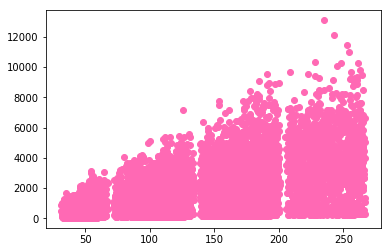

In [15]:
# Item MRP Vs Sales
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color= "hotpink")

In [16]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Cat Variables

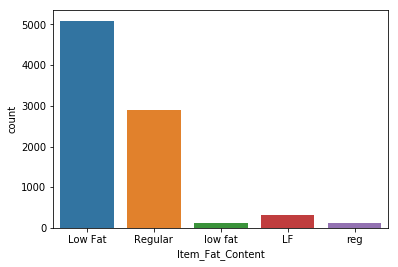

In [17]:
# Item Fat Content
sns.countplot(x = "Item_Fat_Content", data = train)

### Observation: Item Fat Content

Fat Content is showing Multiple categories of Two Major Categories which are Low Fat and Regular. Hence, all the remaining cats will be merged.

In [91]:
# Replacing the Item Fat Content with the resp Cats...
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace=["low fat", "LF", "reg"],
                          value = ["Low Fat", "Low Fat", "Regular"])

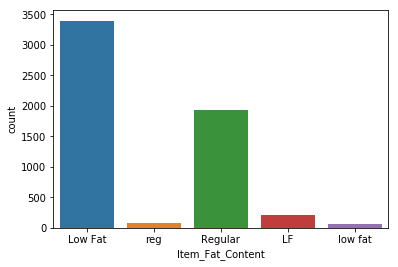

In [19]:
sns.countplot(x = "Item_Fat_Content", data = test)

In [92]:
# Replacing the Item Fat Content with the resp Cats...
test.Item_Fat_Content = test.Item_Fat_Content.replace(to_replace=["low fat", "LF", "reg"],
                          value = ["Low Fat", "Low Fat", "Regular"])

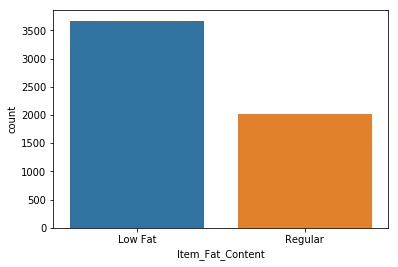

In [21]:
sns.countplot(x = "Item_Fat_Content", data = test)

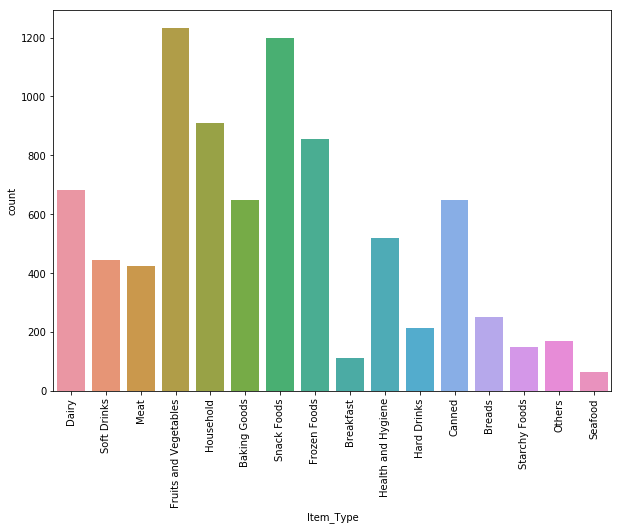

In [22]:
# Item Type
plt.figure(figsize=[10,7])
sns.countplot(x = "Item_Type", data = train)
plt.xticks(rotation= 90)
plt.show()

### Observation: Item Type

1. Fruits and Veggies

2. Snack Foods

3. Frozen Food

These are the most saleable items

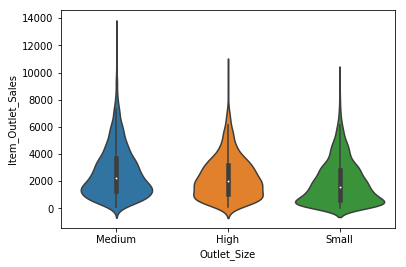

In [23]:
sns.violinplot(x = "Outlet_Size",y = "Item_Outlet_Sales",data = train)

### Bivariate Analysis - Item Visibility and Sales

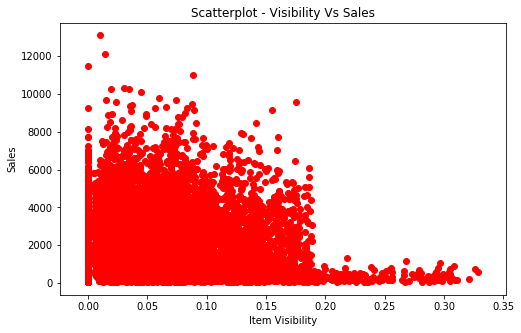

In [24]:
plt.figure(figsize=[8,5])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, 
            color="red")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.title("Scatterplot - Visibility Vs Sales")
plt.show()

### Observation: Item Visibility Vs Sales

Highly Visible Items have lesser sales.

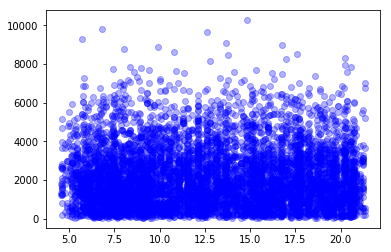

In [25]:
# Item Weight Vs Sales
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, 
            color="blue", alpha = 0.3)

### Observation: Item Weight Vs Sales
No pattern seen...

In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


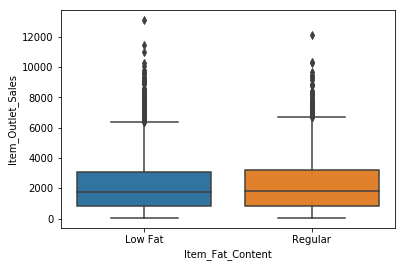

In [27]:
# Item Fat Content vs Sales
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales",
           data = train)

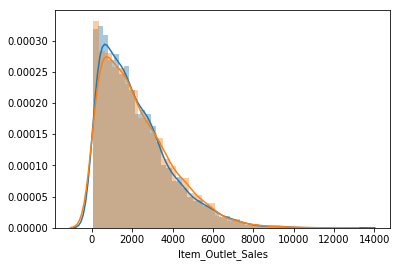

In [28]:
sns.distplot(train[train.Item_Fat_Content=="Low Fat"]["Item_Outlet_Sales"])
sns.distplot(train[train.Item_Fat_Content=="Regular"]["Item_Outlet_Sales"])

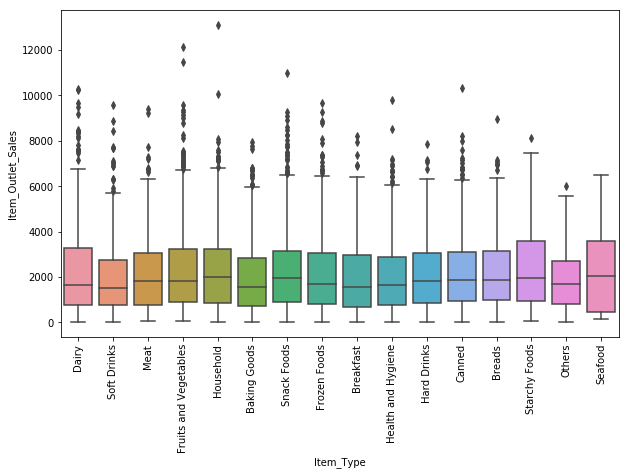

In [29]:
# Item Type Vs Sales
plt.figure(figsize=[10,6])
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales",
           data = train)
plt.xticks(rotation= 90)
plt.show()

In [30]:
print(train[train.Item_Outlet_Sales>8000].Item_Type.unique())

['Snack Foods' 'Dairy' 'Fruits and Vegetables' 'Frozen Foods'
 'Starchy Foods' 'Breads' 'Health and Hygiene' 'Soft Drinks' 'Canned'
 'Household' 'Breakfast' 'Meat']


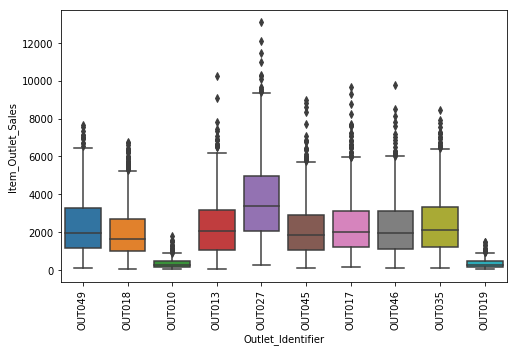

In [31]:
# Identifying the Outlet
plt.figure(figsize=[8,5])
sns.boxplot(x = "Outlet_Identifier", 
            y = "Item_Outlet_Sales", data=train)
plt.xticks(rotation = 90)
plt.show()

In [32]:
# Outlet 27 Max Sales Guy on the Street...
train[train.Outlet_Identifier=="OUT027"]["Outlet_Establishment_Year"].unique()

array([1985], dtype=int64)

### Observation: Outlet 27

We have observed that if an Outlet is of Medium Size, Belongs to Tier 3 city and is of Supermarket Type3 then it will have max sales.

What all Items are kept in Outlet 27: All Item Types are being Sold there...

How old is Outlet 27: 28 years of existence

### Observation: Outlet 10
We have observed that if an Outlet is of Small Size, Belongs to Tier 3 city and is of Grocery Store which results in Lower Sales

What all Items are kept in Outlet 10: All Item Types are being Sold there...

How old is Outlet 10: 15 years of existence

In [33]:
train[(train.Outlet_Size=="Small") & (train.Outlet_Type=="Grocery Store")]["Item_Outlet_Sales"].describe()

count     528.000000
mean      340.329723
std       249.979449
min        33.955800
25%       153.633350
50%       265.321300
75%       460.733600
max      1482.070800
Name: Item_Outlet_Sales, dtype: float64

### Observations Store Type

Store Type: Small and Grocery

1. Max Sales is 1500 where as Min is 33

In [34]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

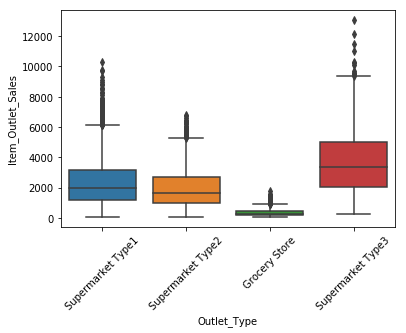

In [35]:
sns.boxplot(x = 'Outlet_Type', y = "Item_Outlet_Sales", data=train)
plt.xticks(rotation = 45)

### Observation - 'Outlet_Location_Type' & Outlet Type
1. Tier 3 has max sales
2. Supermarket Type 03 has Max Sales

## Missing Values

In [93]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [38]:
test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [94]:
# Outlet Size - Missing Values Filled
train.Outlet_Size.fillna(value = "Medium", inplace= True)

In [95]:
# Outlet Size - Missing Values Filled
test.Outlet_Size.fillna(value = "Medium", inplace= True)

In [41]:
# Item Weight - Missing Values
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
# FDA15
train[train.Item_Identifier=="FDN15"]["Item_Weight"]

2       17.5
759     17.5
4817    17.5
5074    17.5
6163    17.5
6952     NaN
8349     NaN
Name: Item_Weight, dtype: float64

## Understanding how the ID will help impute Item Weight

In [97]:
df = train[["Item_Identifier", "Item_Weight"]]

In [108]:
df.head()

,Item_Identifier,Item_Weight,weight
0,FDA15,9.30,9.30
1,DRC01,5.92,5.92
2,FDN15,17.50,17.50
3,FDX07,19.20,19.20
4,NCD19,8.93,8.93


In [116]:
train[train.Item_Identifier=="FDA15"]["Item_Weight"]

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    9.3
7543    9.3
Name: Item_Weight, dtype: float64

In [107]:
df["weight"]=df.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
train["Item_Weight"]=train.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [117]:
test["Item_Weight"]=test.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [118]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [148]:
# 04 Missing Values Left
train[pd.isnull(train.Item_Weight)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [146]:
# Frozen Food
train[train.Item_Type=="Baking Goods"]["Item_Weight"].describe()

count    647.000000
mean      12.285317
std        4.749789
min        4.880000
25%        8.235000
50%       11.650000
75%       15.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [139]:
# Imputting Median
#train[train.Item_Identifier=="FDN52"].loc("Item_Weight").fillna(12.85, inplace=True)

In [137]:
# Imputting Median using Iloc
train.iloc[927,1]=12.85 # Frozen Food

In [141]:
train.iloc[1922, 1] = 13.150000 # Snacks

In [144]:
train.iloc[4187,1] = 13.350000 # Dairy

In [147]:
train.iloc[5022, 1] = 11.650000 # Baking Goods

In [159]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [160]:
test[pd.isnull(test.Item_Weight)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [158]:
# Imputting Missing Value in Test Basis item type
test["Item_Weight"] = 
test.groupby("Item_Type")["Item_Weight"].transform(lambda x:x.fillna(x.median()))

## Feature Engineering

Hints

1. Item ID

2. Price Per Unit

3. Item Type

4. Establishment Year

In [161]:
# Item ID
train.Item_Identifier[0][:2]

'FD'

In [162]:
itemid=[]
for i in range(0, len(train.Item_Identifier)):
    itemid.append(train.Item_Identifier[i][:2])

In [163]:
# Creatng a New Variable called Item Category
train["Item_Category"]=itemid

In [164]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [165]:
itemid=[]
for i in range(0, len(test.Item_Identifier)):
    itemid.append(test.Item_Identifier[i][:2])
# Creatng a New Variable called Item Category
test["Item_Category"]=itemid

In [166]:
# Year of Establishment
train["Existence_Years"] = 2013-train.Outlet_Establishment_Year
test["Existence_Years"] = 2013-test.Outlet_Establishment_Year

In [167]:
# Replacing 0s with Median
test.Item_Visibility.describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [168]:
# Replacing the Item Visibility 0s with Median Values
train["Item_Visibility"].replace(to_replace=0, value = 0.053931, 
                                 inplace = True)

In [169]:
test["Item_Visibility"].replace(to_replace=0, value =  0.054154, 
                                 inplace = True)

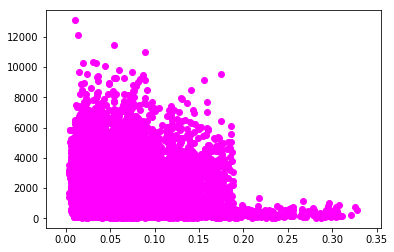

In [170]:
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color="magenta")

In [58]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence_Years
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.2,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [171]:
train["Item_Weight"]=train.Item_Weight.astype("float")

In [172]:
test["Item_Weight"]=test.Item_Weight.astype("float")

In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
Item_Category                5681 non-null object
Existence_Years              5681 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 577.1+ KB


In [174]:
# Price Per Unit
train["Price_Per_Unit"] = train.Item_MRP/train.Item_Weight

In [175]:
test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

In [176]:
train.shape

(8523, 15)

In [177]:
test.shape

(5681, 14)

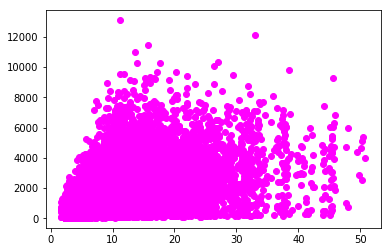

In [178]:
plt.scatter(train.Price_Per_Unit, train.Item_Outlet_Sales, color="magenta")

In [180]:
# Item Type
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [181]:
# Perishables
perishables =['Dairy', 'Meat', 'Fruits and Vegetables','Frozen Foods',
       'Breakfast','Breads','Seafood']

In [184]:
# where it matches the list of perishables, "Perishables" else "Non Perishables"
train["ItemType_Cat"] = np.where(train.Item_Type.isin(perishables), "Perishables", "Non Perishables")

In [185]:
test["ItemType_Cat"] = np.where(test.Item_Type.isin(perishables), "Perishables", "Non Perishables")

In [186]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence_Years,Price_Per_Unit,ItemType_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581,Non Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457,Perishables
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115,Perishables
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512,Non Perishables


# Model Building Stage

Data Pre-Processing which includes SS starts from here...

In [187]:
# Item ID, Outlet IDentifier, Outyear
newtrain = train.drop(["Item_Identifier","Outlet_Identifier", "Outlet_Establishment_Year", "Item_Type"],
          axis = 1)

In [188]:
newtest = test.drop(["Item_Identifier","Outlet_Identifier", "Outlet_Establishment_Year", "Item_Type"],
          axis = 1)

In [189]:
print(newtrain.shape)
print(newtest.shape)

(8523, 12)
(5681, 11)


In [190]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Existence_Years,Price_Per_Unit,ItemType_Cat
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,26.861204,Perishables
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,8.153581,Non Perishables
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,8.092457,Perishables
3,19.20,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,15,9.484115,Perishables
4,8.93,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26,6.031512,Non Perishables


# Applying Encoding

Label or OHE

Label encoding is applied where the data or values follow a certain order where we can say that one value is greater than the other for eg shirt size. S>M>L. However, where we see that there is no order and hence it is imperative to apply OHE(pd.get_dummies)

In [191]:
dummy_train = pd.get_dummies(newtrain)
dummy_test = pd.get_dummies(newtest)

In [192]:
dummy_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Existence_Years,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_DR,Item_Category_FD,Item_Category_NC,ItemType_Cat_Non Perishables,ItemType_Cat_Perishables
0,9.30,0.016047,249.8092,3735.1380,14,26.861204,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,8.153581,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,14,8.092457,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,19.20,0.053931,182.0950,732.3800,15,9.484115,0,1,0,1,...,1,1,0,0,0,0,1,0,0,1
4,8.93,0.053931,53.8614,994.7052,26,6.031512,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [193]:
# Applying Standard Scaler
from sklearn.preprocessing import StandardScaler

In [194]:
sc= StandardScaler()

In [195]:
scaled_train = pd.DataFrame(sc.fit_transform(dummy_train), 
             columns=dummy_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [196]:
scaled_test = pd.DataFrame(sc.fit_transform(dummy_test), 
             columns=dummy_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [197]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [198]:
x = scaled_train.drop("Item_Outlet_Sales", axis = 1)
y = scaled_train.Item_Outlet_Sales

In [199]:
# Fitting the Model
rf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [201]:
# Predict using Test Set
pred = rf.predict(scaled_test) # Scaled Values

### Conversion of Scaled Value into Original Values...
e^x and Log(e)

1. This will be achieved using Standard Scaler...

2. U will have to run the standard scaler of the column which you wish to transform and then apply Inverse Transform to bring it back into the org values

In [213]:
# Apply Standard Scaler
mysales = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [205]:
# Inverse Transform
sales = sc.inverse_transform(pred)

In [207]:
# Preparing Data Frame for Submission into CSV
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier":test.Outlet_Identifier,
             "Item_Outlet_Sales":sales})

In [208]:
# Exporting the solution in csv
solution.to_csv("Random Forest Model.csv", index=False) # 1254.26374553713

In [209]:
cd

C:\Users\Mumbai-Admin


In [210]:
# Decision tree Model
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [212]:
pred_tree = dtree.fit(x,y).predict(scaled_test)

In [214]:
# Inverse Transform
sales = sc.inverse_transform(pred_tree)

In [216]:
# Preparing Data Frame for Submission into CSV
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier":test.Outlet_Identifier,
             "Item_Outlet_Sales":sales})

# Exporting the solution in csv
solution.to_csv("Tree Model.csv", index=False) # 1625.8461570796003.

In [217]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
ada =AdaBoostRegressor()

In [218]:
pred_ada = ada.fit(x,y).predict(scaled_test)

In [219]:
# Inverse Transform
sales = sc.inverse_transform(pred_ada)

In [220]:
# Preparing Data Frame for Submission into CSV
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier":test.Outlet_Identifier,
             "Item_Outlet_Sales":sales})

# Exporting the solution in csv
solution.to_csv("ADA.csv", index=False) # 1339